In [1]:
################################################ imports############################################################
import pandas as pd
import numpy as np
import pydot
import pydotplus
import graphviz
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.utils import to_categorical
import math
import matplotlib.pyplot as plt

################################################# Load Data #######################################################

df = pd.read_excel('data/data.xlsx')

################################################# One Hot Encoding #######################################################
encodings = [0] * df.shape[0]
rowcount = 0
for index, row in df.iterrows():
    i = 0
    target = row['target']
    gRNA = row['gRNA']
    temp = [0] * len(target)
    while i < len(target):
        if target[i] == gRNA[i]:
            temp[i] = 0
        else:
            temp[i] = 1
        i = i + 1
    encodings[rowcount] = np.array(temp) 
    rowcount = rowcount + 1
#print(encodings)

################################################# Split data 80/20 #######################################################
df_x  =   pd.DataFrame(list(map(np.ravel, encodings)))                  
df["cfdScore"] = pd.to_numeric(df["cfdScore"], downcast="float")
#print(df.dtypes)
# print(df_x)
y = df.cfdScore
x =   df_x 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

df.drop(['wasValidated','readFraction'],axis=1).head()

2021-12-10 13:58:20.582999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-10 13:58:20.583018: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


shape of input - training set (20841, 23)
shape of output - training set (20841,)
shape of input - testing set (5211, 23)
shape of output - testing set (5211,)


,target,gRNA,cfdScore
0,GACCCCCTCCACCCCGCCTCCGG,GACCCCCCACCCCCCGCCCCTGA,0.006568
1,TGGATGGAGGAATGAGGAGTTGG,AGGAAGGATGACTGAGGAGTGAG,0.018194
2,GGTGAGTGAGTGTGTGCGTGTGG,CGTGTGTGCGTGTGTGCGTGTGG,0.148423
3,GGTGAGTGAGTGTGTGCGTGTGG,TGTGTATGAGTGTGTGGGTGTAG,0.005546
4,GCCTCCCCAAAGCCTGGCCAGGG,GCTTCCCCAGTGCCTGGACATGG,0.063281


In [2]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [3]:
################################################# Feed Forward Network #######################################################
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(encodings[8]),)))
model.add(layers.Dense(8, activation='relu'))
model.add(Dense(1)) #, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss='mse',
                metrics=['mae'])
model.summary()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=35,
                    batch_size=200)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                384       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35


2021-12-10 13:58:24.323586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-10 13:58:24.323601: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-10 13:58:24.323613: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (idgaf): /proc/driver/nvidia/version does not exist
2021-12-10 13:58:24.323745: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


105/105 [==============================] - 0s 2ms/step - loss: 0.1259 - mae: 0.2416 - val_loss: 0.0193 - val_mae: 0.1017
Epoch 2/35
105/105 [==============================] - 0s 700us/step - loss: 0.0114 - mae: 0.0736 - val_loss: 0.0079 - val_mae: 0.0586
Epoch 3/35
105/105 [==============================] - 0s 710us/step - loss: 0.0072 - mae: 0.0548 - val_loss: 0.0070 - val_mae: 0.0503
Epoch 4/35
105/105 [==============================] - 0s 700us/step - loss: 0.0063 - mae: 0.0495 - val_loss: 0.0063 - val_mae: 0.0473
Epoch 5/35
105/105 [==============================] - 0s 701us/step - loss: 0.0056 - mae: 0.0455 - val_loss: 0.0056 - val_mae: 0.0436
Epoch 6/35
105/105 [==============================] - 0s 688us/step - loss: 0.0051 - mae: 0.0418 - val_loss: 0.0053 - val_mae: 0.0399
Epoch 7/35
105/105 [==============================] - 0s 701us/step - loss: 0.0047 - mae: 0.0393 - val_loss: 0.0050 - val_mae: 0.0404
Epoch 8/35
105/105 [==============================] - 0s 703us/step - loss:

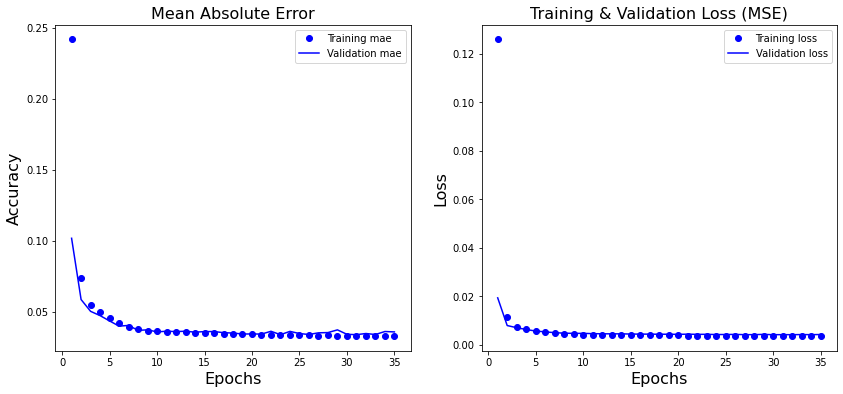

In [4]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training mae')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation mae')
ax[0].set_title('Mean Absolute Error', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss (MSE)', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [5]:
##################################### RNN #######################################################################3


model = Sequential()
model.add(SimpleRNN(16, input_shape=(len(encodings[8]),1), 
                        activation='relu')) #tanh
model.add(Dense(units=8, activation='relu')) #tanh
# model.add(Dense(1))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='mse',metrics=['mae'])
model.summary()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=35,batch_size=200)   

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 16)                288       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
105/105 [==============================] - 1s 3ms/step - loss: 0.0092 - mae: 0.0535 - val_loss: 0.0073 - val_mae: 0.0449
Epoch 2/35
105/105 [==============================] - 0s 2ms/step - loss: 0.0070 - mae: 0.0445 - val_loss: 0.0072 - val_mae: 0.0445
Epoch 3/35
105/105 [==============================] - 0s 2ms/step - loss: 0.0069 - mae: 0.0441 - val_loss: 0.0071 - val_mae: 0.0435
Epoch 4/35
105/105 [==============================] - 0s

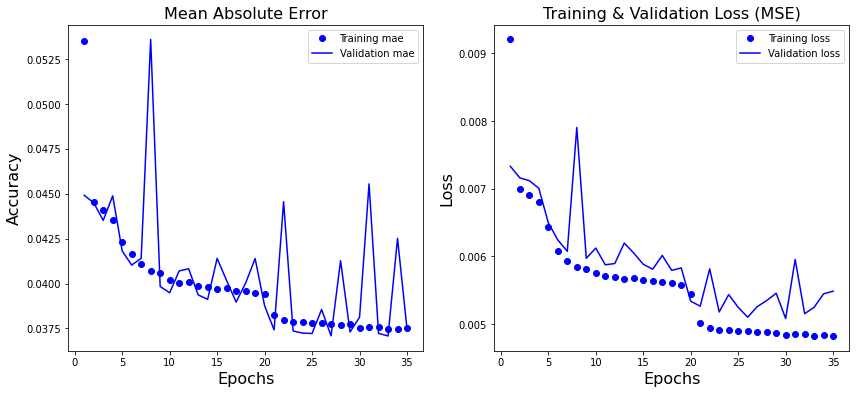

In [6]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training mae')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation mae')
ax[0].set_title('Mean Absolute Error', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss (MSE)', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [7]:
################################################### Perceptron #####################################################

model = Sequential()
model.add(Dense(16, input_shape=(23, ), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='mse',metrics=['mae'])
model.summary()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=35,
                    batch_size=200) 

y_pred = model.predict(x_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                384       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
105/105 [==============================] - 0s 1ms/step - loss: 0.0563 - mae: 0.1731 - val_loss: 0.0136 - val_mae: 0.0835
Epoch 2/35
105/105 [==============================] - 0s 708us/step - loss: 0.0085 - mae: 0.0621 - val_loss: 0.0066 - val_mae: 0.0503
Epoch 3/35
105/105 [==============================] - 

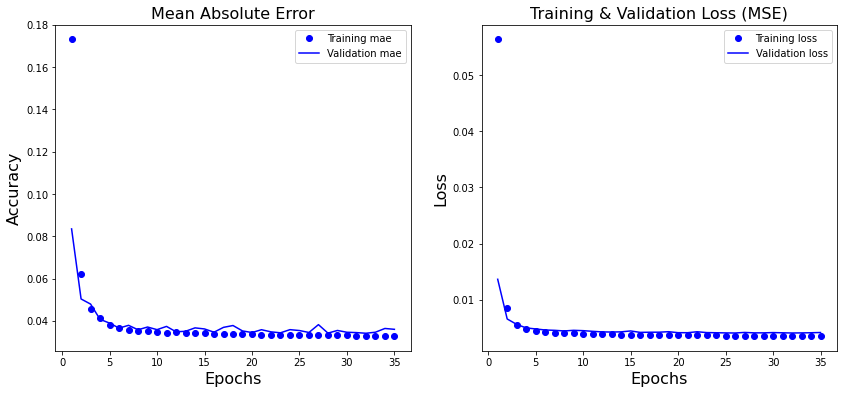

In [8]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training mae')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation mae')
ax[0].set_title('Mean Absolute Error', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss (MSE)', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [9]:
for v in ['o'] + [' '.join('*' * i) for i in range(3, 10, 2)] + ['|', '|']:
    print('{:~^17}'.format(v))
print("HAPPY HOLIDAYS")

~~~~~~~~o~~~~~~~~
~~~~~~* * *~~~~~~
~~~~* * * * *~~~~
~~* * * * * * *~~
* * * * * * * * *
~~~~~~~~|~~~~~~~~
~~~~~~~~|~~~~~~~~
HAPPY HOLIDAYS
